Install Dependencies 

In [0]:
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal
!pip install rasterio
!pip install pyproj

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [6,779 B]
Get:12 http://ppa.

Mount Google Drive

In [0]:
!ls "/content/drive/My Drive/EIE Side Projects/lu_data_upgrade/de_1m_2013_extended-test_tiles"

ls: cannot access '/content/drive/My Drive/EIE Side Projects/lu_data_upgrade/de_1m_2013_extended-test_tiles': No such file or directory


In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')


!ls "/content/drive/My Drive/EIE Side Projects/lu_data_upgrade/de_1m_2013_extended-test_tiles/m_3807504_ne_18_1_lu.tif"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'/content/drive/My Drive/EIE Side Projects/lu_data_upgrade/de_1m_2013_extended-test_tiles/m_3807504_ne_18_1_lu.tif'


Read Data with rasterio

In [0]:
import rasterio

# Brandon
#fn = "/content/drive/Shared drives/EIE Side Projects/lu_data_upgrade/de_1m_2013_extended-test_tiles/m_3807504_ne_18_1_lu.tif" 

# Peter
fn = "/content/drive/My Drive/EIE Side Projects/lu_data_upgrade/de_1m_2013_extended-test_tiles/m_3807504_ne_18_1_lu.tif"

with rasterio.open(fn, "r") as f:
  data = f.read()
  # print('width:', f.width, 'height:', f.height)
  # print('coordinates:', f.crs)
  # print('transform:\n', f.transform)
  # print('count:', f.count)
  # print('indexes:', f.indexes)
  # print('bounds:', f.bounds)

  # print('raster:', f.meta)

  # print(f.transform * (0, 0))

width: 6056 height: 7569
coordinates: EPSG:26918
transform:
 | 1.00, 0.00, 450949.00|
| 0.00,-1.00, 4317228.00|
| 0.00, 0.00, 1.00|
count: 1
indexes: (1,)
bounds: BoundingBox(left=450949.0, bottom=4309659.0, right=457005.0, top=4317228.0)
raster: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 6056, 'height': 7569, 'count': 1, 'crs': CRS.from_epsg(26918), 'transform': Affine(1.0, 0.0, 450949.0,
       0.0, -1.0, 4317228.0)}
(450949.0, 4317228.0)


(457005.0, 4309659.0)

Plot with matplotlib

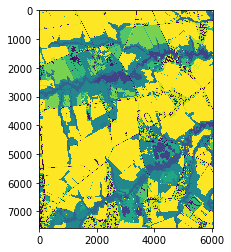

In [0]:
from matplotlib import pyplot
pyplot.imshow(data[0,:,:])

# map image: https://www.google.com/maps/place/38%C2%B058'07.5%22N+75%C2%B031'52.5%22W/@38.9731444,-75.5476396,4289m/data=!3m1!1e3!4m5!3m4!1s0x0:0x0!8m2!3d38.9687551!4d-75.5312588

In [0]:
data[0,:,:].shape

(7569, 6056)

Calculate geographic coordinates of image

In [0]:
from pyproj import Proj, transform

# coordinate system: the definition of the local, regional, or global system in which a raster’s pixels are located
# dataset.crs

# affine transformation: the parameters by which pixel coordinates are transformed into coordinates in that system 
# dataset.transform

inProj = Proj(str(dataset.crs))
outProj = Proj('epsg:4326')

# convert the point in the middle of the data set to coordinates within the crs reference frame 
# (this is a matrix multiplication)
x_crs,y_crs = dataset.transform.__mul__([dataset.width/2, dataset.height/2])


# convert from the crs reference frame to the WGS-84 reference frame
x_wgs84,y_wgs84 = transform(inProj,outProj,x_crs,y_crs)

